## ***project # 02***


# **Retail Sales Data Analysis Report**
*Table of Content*
1. project overview
2. dataset description
3. data cleaning & preparation
4. exploratory data analysis (EDA)
   * distribution analysis
   * gender distribution
   * product catagory sales
   * sales trend overtime
   * age vs total spending
   * outliers detection
   * correlation analysis
5. key insight
6. conclusion




## Project Overview
This project involves a comprehensive analysis of retail sales data to derive insights into customer behavior, sales trends, and product performance. The scope of this analysis covers various aspects of sales transactions, customer demographics, and product categories.

## Purpose of Analysis
The main goals and objectives of analyzing this retail sales data are to:
- Identify key trends in sales over time.
- Understand the distribution of sales across different product categories.
- Analyze customer demographics (age and gender) to uncover purchasing patterns.
- Evaluate the relationship between different variables, such as quantity, price per unit, and total amount.
- Provide actionable insights for business strategies, inventory management, and marketing campaigns.

## Column Descriptions

- **Transaction ID**: `int64`
  A unique identifier for each sales transaction.
- **Date**: `object` (should be converted to datetime)
  The date on which the transaction occurred.
- **Customer ID**: `object`
  A unique identifier for each customer.
- **Gender**: `object`
  The gender of the customer (Male/Female).
- **Age**: `int64`
  The age of the customer at the time of transaction.
- **Product Category**: `object`
  The category of the product purchased (e.g., Beauty, Clothing, Electronics).
- **Quantity**: `int64`
  The number of units of the product purchased in the transaction.
- **Price per Unit**: `int64`
  The price of a single unit of the product.
- **Total Amount**: `int64`
  The total amount paid for the transaction (Quantity * Price per Unit).

# *importing libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **DATA CLEANING & PREPRATION**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# ***EXPLORATORY DATA ANALYSIS (EDA)***

In [ ]:
numerical_cols = ['Total Amount', 'Age', 'Quantity', 'Price per Unit']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n--- Outliers for {col} ---")
    if not outliers.empty:
        print(outliers[['Transaction ID', col]])
    else:
        print(f"No outliers found for {col}.")


--- Outliers for Total Amount ---
No outliers found for Total Amount.

--- Outliers for Age ---
No outliers found for Age.

--- Outliers for Quantity ---
No outliers found for Quantity.

--- Outliers for Price per Unit ---
No outliers found for Price per Unit.


In [ ]:
df.mean(numeric_only=True)

,0
Transaction ID,500.500
Age,41.392
Quantity,2.514
Price per Unit,179.890
Total Amount,456.000


In [ ]:
df.median(numeric_only=True)

,0
Transaction ID,500.5
Age,42.0
Quantity,3.0
Price per Unit,50.0
Total Amount,135.0


In [ ]:
df.mode(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,43.0,4.0,50.0,50.0
1,2,64.0,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,996,NaN,NaN,NaN,NaN
996,997,NaN,NaN,NaN,NaN
997,998,NaN,NaN,NaN,NaN
998,999,NaN,NaN,NaN,NaN


In [ ]:
df.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


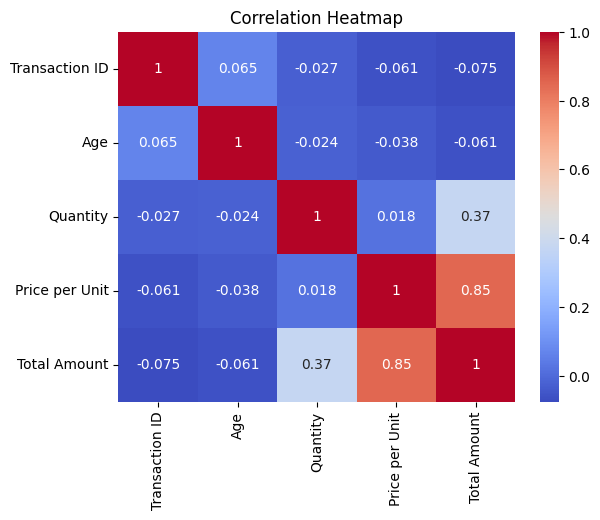

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

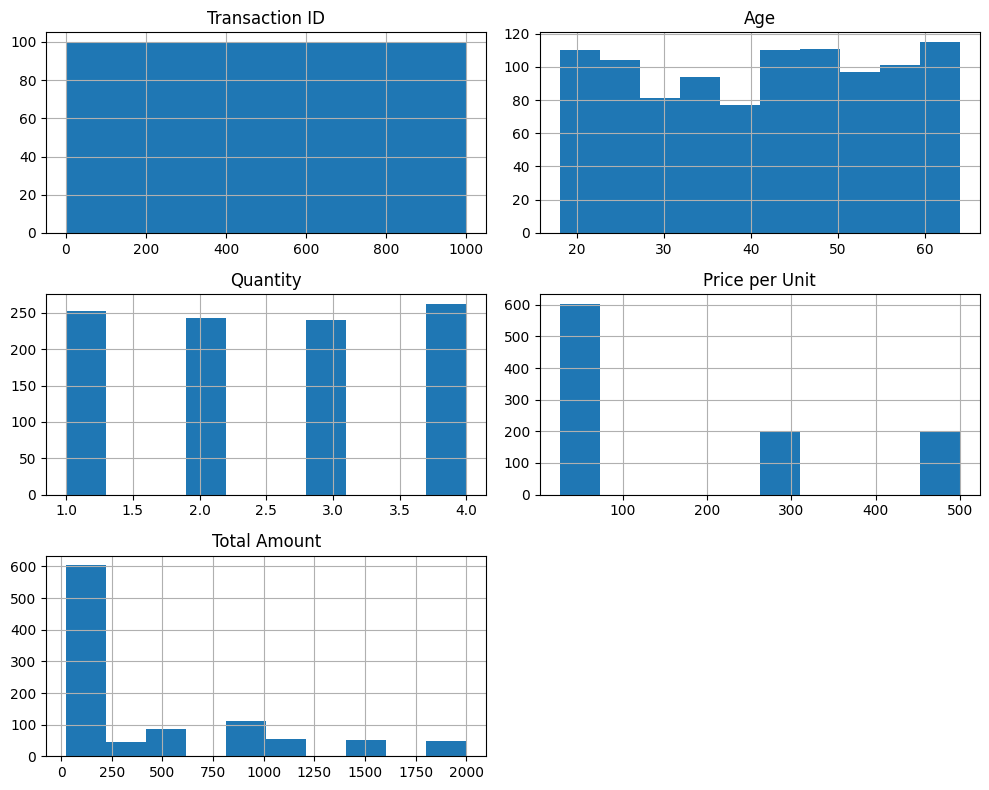

In [ ]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

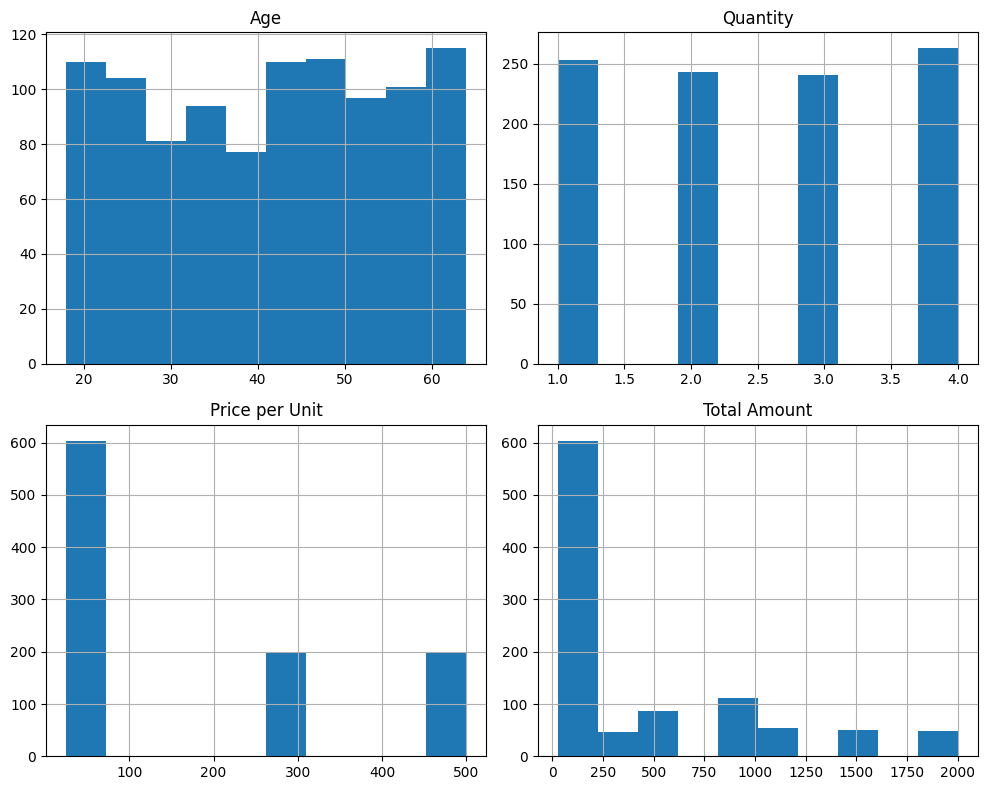

In [ ]:
df[["Age","Quantity","Price per Unit","Total Amount"]].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

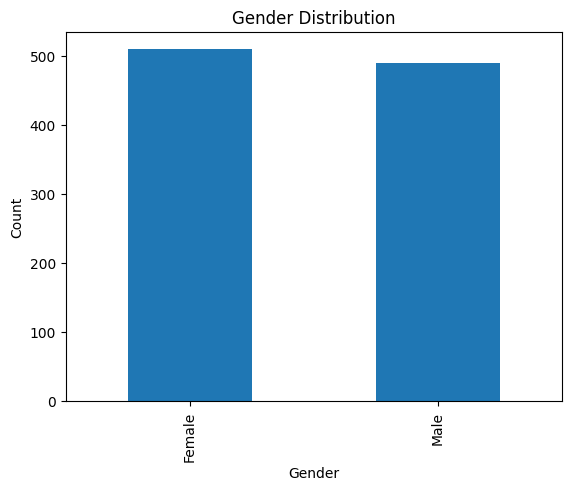

In [ ]:
df["Gender"].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

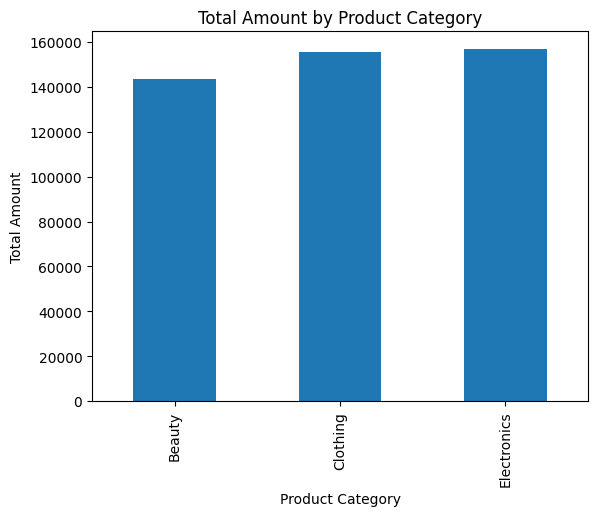

In [ ]:
df.groupby("Product Category")["Total Amount"].sum().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Product Category')
plt.show()

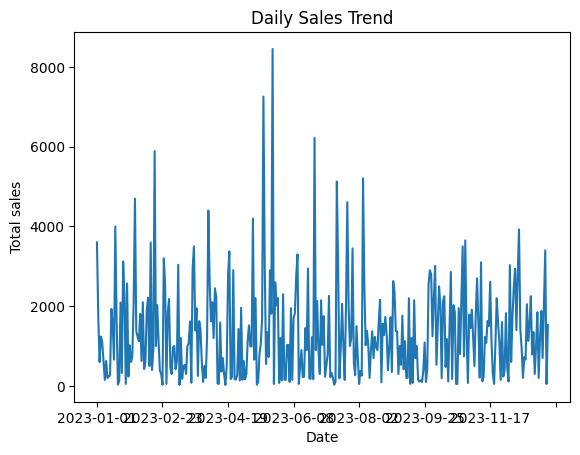

In [ ]:
df.groupby("Date")["Total Amount"].sum().plot(kind="line")
plt.title("Daily Sales Trend")
plt.ylabel("Total sales")
plt.show()

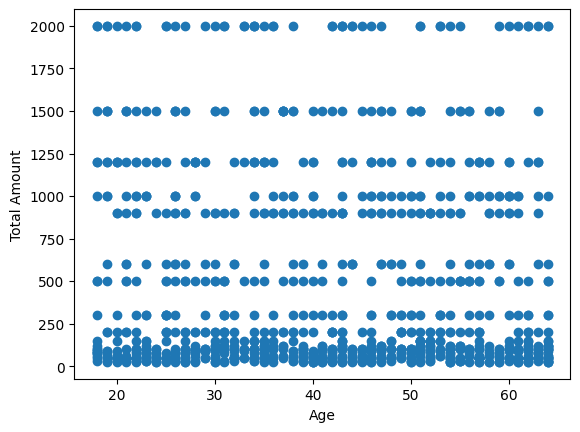

In [ ]:
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.show()

### Question 1: What is the total number of transactions?

In [4]:
total_transactions = df['Transaction ID'].nunique()
print(f"Total number of transactions: {total_transactions}")

Total number of transactions: 1000


### Question 2: How many unique customers are there in the dataset?

In [5]:
unique_customers = df['Customer ID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 1000


### Question 3: Which product category generated the highest total sales amount?

In [6]:
highest_sales_category = df.groupby('Product Category')['Total Amount'].sum().idxmax()
print(f"Product category with highest total sales: {highest_sales_category}")

Product category with highest total sales: Electronics


### Question 4: What is the average age of the customers?

In [7]:
average_age = df['Age'].mean()
print(f"Average age of customers: {average_age:.2f} years")

Average age of customers: 41.39 years


### Question 5: What is the distribution of sales (Total Amount) by gender?

In [8]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
print("Total sales amount by gender:")
print(sales_by_gender)

Total sales amount by gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


### Question 6: What is the maximum 'Total Amount' for a single transaction?

In [9]:
max_total_amount = df['Total Amount'].max()
print(f"Maximum total amount in a single transaction: ${max_total_amount}")

Maximum total amount in a single transaction: $2000


### Question 7: How many transactions occurred for each 'Product Category'?

In [10]:
transactions_by_category = df['Product Category'].value_counts()
print("Number of transactions per product category:")
print(transactions_by_category)

Number of transactions per product category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


### Question 8: What is the average 'Price per Unit' across all products?

In [11]:
average_price_per_unit = df['Price per Unit'].mean()
print(f"Average Price per Unit: ${average_price_per_unit:.2f}")

Average Price per Unit: $179.89


### Question 9: What is the total quantity of products sold?

In [12]:
total_quantity_sold = df['Quantity'].sum()
print(f"Total quantity of products sold: {total_quantity_sold}")

Total quantity of products sold: 2514


### Question 10: What is the correlation between 'Age' and 'Total Amount'?

In [13]:
correlation_age_total_amount = df['Age'].corr(df['Total Amount'])
print(f"Correlation between Age and Total Amount: {correlation_age_total_amount:.2f}")

Correlation between Age and Total Amount: -0.06


## Key Insights from Retail Sales Data

Based on the initial exploratory data analysis and calculated metrics, here are some key insights from the dataset:

*   **Consistent Customer Base**: The dataset contains 1000 unique customers for 1000 transactions, which might suggest that each customer made only one purchase recorded in this dataset, or that Customer IDs are unique per transaction rather than per individual.

*   **Electronics Dominates Sales Revenue**: The 'Electronics' product category generated the highest total sales amount, indicating it is the most lucrative category. This could be due to higher price points, higher demand, or a combination of both.

*   **Balanced Gender Sales Contribution**: Total sales are relatively balanced between genders, with Female customers contributing slightly more to the total sales amount ($232,840) compared to Male customers ($223,160). This suggests that both genders are significant consumer groups for the business.

*   **Weak Correlation between Age and Spending**: The correlation between 'Age' and 'Total Amount' is very weak and slightly negative (-0.06). This implies that a customer's age doesn't have a strong linear relationship with how much they spend per transaction in this dataset. Spending habits are likely influenced by other factors not directly tied to age.

*   **Clothing Leads in Transaction Volume**: While 'Electronics' leads in sales value, 'Clothing' has the highest number of transactions (351), followed closely by 'Electronics' (342). This suggests that Clothing products are frequently purchased, potentially at lower price points per transaction.

*   **High Variability in Price and Transaction Value**: The `Price per Unit` has a high standard deviation and a large range (from $25 to $500), and the `Total Amount` also shows significant variation (from $25 to $2000). This indicates a diverse product offering with varying price points and customer purchasing behaviors leading to a wide range of transaction values.

## Conclusion

This comprehensive analysis of retail sales data provided valuable insights into customer behavior, sales trends, and product performance. We identified 'Electronics' as the highest revenue-generating category, while 'Clothing' led in transaction volume, suggesting different strategic approaches for each. Sales contributions were found to be balanced between genders, indicating broad market appeal. A weak correlation between age and total spending suggests other factors drive purchase behavior more significantly.

Key actionable insights include:
*   **Strategic Focus**: Given the high revenue from 'Electronics', further analysis could optimize inventory and marketing for this category, potentially exploring high-value items.
*   **Volume vs. Value**: For 'Clothing', strategies to increase average transaction value (e.g., cross-selling, upselling) could be beneficial, alongside maintaining its high transaction frequency.
*   **Targeted Marketing**: While age doesn't strongly predict spending, understanding purchasing patterns within specific age groups for different product categories could refine marketing efforts.
*   **Operational Efficiency**: The dataset appears clean with no missing values or duplicates, providing a reliable foundation for further in-depth analysis or predictive modeling.

Overall, the data indicates a diverse customer base and varied product performance, offering multiple avenues for business growth and optimization through targeted strategies.

## References

*   **Dataset Source**: KAGGLE.COM